In [19]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import torch
from torch import nn
import torchvision.datasets as datasets
from tqdm import tqdm
from torchvision import transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, random_split, Subset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from variationalautoencoder import variationalautoencoder ##Please don't forget

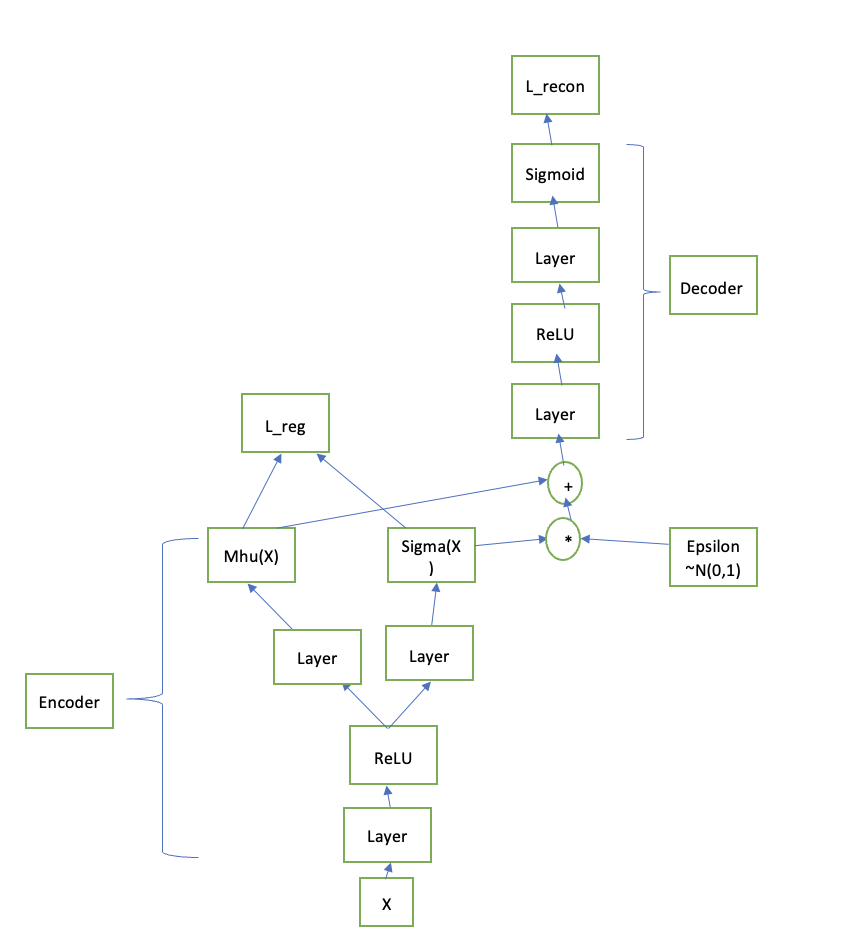

In [53]:
input_dim=784
hidden_dim=200
latent_dim=20
n_epochs=200
batch_size=64
lr=1e-4

dataset=datasets.MNIST(root='dataset/',train=True,transform=transforms.ToTensor(),download=True,)

percentage_to_load = 0.2
batch_size = 64

dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)

num_samples = int(len(dataset) * percentage_to_load)

subset_indices = torch.randperm(len(dataset))[:num_samples]
subset_dataset = Subset(dataset, subset_indices)

train_loader = DataLoader(dataset=subset_dataset, batch_size=batch_size, shuffle=True)

subset_indices_test = torch.randperm(len(dataset))[num_samples:]
subset_dataset_test = Subset(dataset, subset_indices_test)

test_loader = DataLoader(dataset=subset_dataset_test, batch_size=batch_size, shuffle=True)

# train_loader= DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)
model=variationalautoencoder(input_dim=input_dim,hidden_dim=hidden_dim,latent_dim=latent_dim)
optimizer=torch.optim.Adam(model.parameters())
loss_fn=nn.BCELoss(reduction="sum")


In [54]:

def generate_and_save_samples(model, epoch, data_loader, save_path, input_dim=784, n_samples=64):
    model.eval()
    with torch.no_grad():
        samples = []
        for i in range(n_samples):
            x, _ = next(iter(data_loader))
            x = x.view(x.shape[0], input_dim)
            x_output, _, _ = model(x)
            samples.append(x_output.view(x.shape[0], 1, 28, 28))

        samples = torch.cat(samples, dim=0)

        # Plotting the samples in an 8x8 grid
        fig, axes = plt.subplots(8, 8, figsize=(10, 10))
        for i in range(n_samples):
            ax = axes[i // 8, i % 8]
            ax.imshow(samples[i].squeeze().cpu().numpy(), cmap='gray')
            ax.axis('off')

        plt.suptitle(f'Generated Samples - Epoch {epoch}', fontsize=16)
        plt.savefig(save_path)
        plt.show()



#### We can see in the next block that image quality improves as we train, the image is less and less blurred, with better details but we very quickly reach loss convergence and it is very difficult to optimise.

0it [00:30, ?it/s]


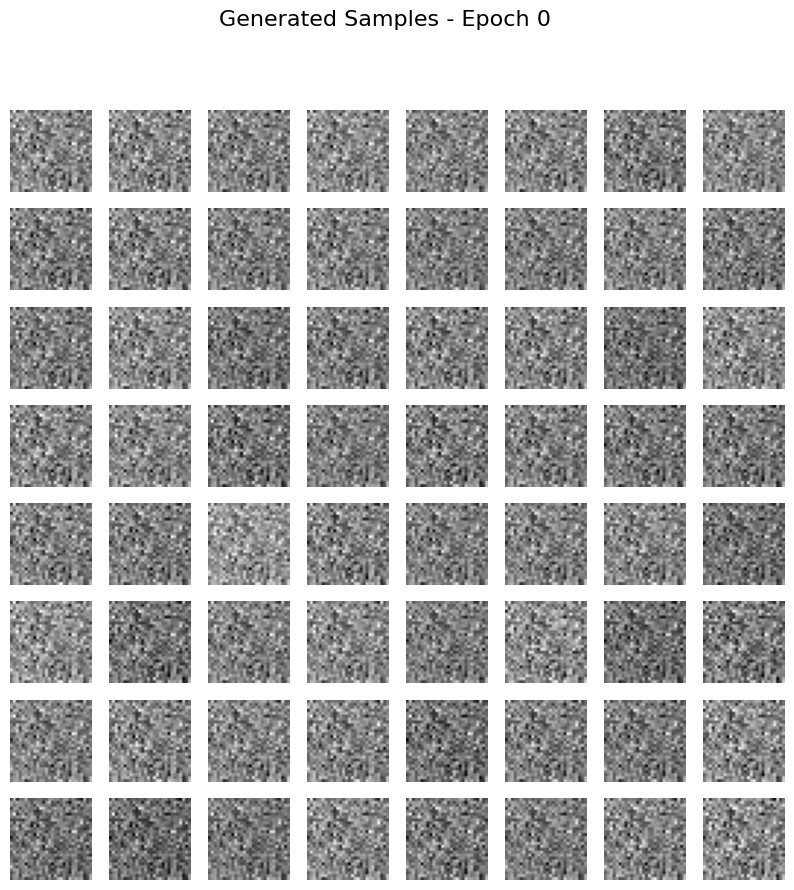

188it [00:03, 49.32it/s, epoch=0, loss=6.83e+3]
188it [00:02, 82.93it/s, epoch=1, loss=5.96e+3]
188it [00:02, 82.37it/s, epoch=2, loss=5.56e+3]
188it [00:02, 85.69it/s, epoch=3, loss=5.2e+3] 
188it [00:02, 83.58it/s, epoch=4, loss=4.87e+3]
188it [00:02, 86.44it/s, epoch=5, loss=4.64e+3]
188it [00:02, 86.48it/s, epoch=6, loss=4.56e+3]
188it [00:02, 86.56it/s, epoch=7, loss=4.39e+3]
188it [00:02, 85.52it/s, epoch=8, loss=4.63e+3]
0it [00:00, ?it/s]

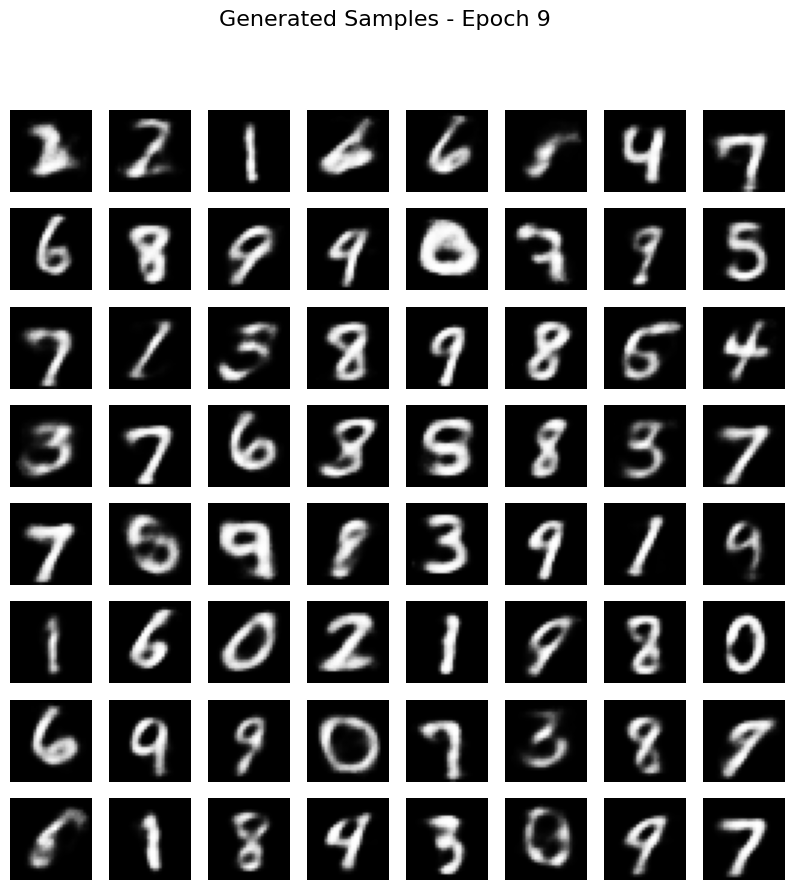

188it [00:03, 51.95it/s, epoch=9, loss=4.1e+3] 
188it [00:02, 86.42it/s, epoch=10, loss=4.51e+3]
188it [00:02, 85.67it/s, epoch=11, loss=4.29e+3]
188it [00:02, 86.67it/s, epoch=12, loss=4.15e+3]
188it [00:02, 85.08it/s, epoch=13, loss=4.37e+3]
188it [00:02, 85.75it/s, epoch=14, loss=4.26e+3]
188it [00:02, 86.94it/s, epoch=15, loss=4.47e+3]
188it [00:02, 85.65it/s, epoch=16, loss=4.09e+3]
188it [00:02, 85.18it/s, epoch=17, loss=4.56e+3]
188it [00:02, 85.48it/s, epoch=18, loss=3.81e+3]
188it [00:02, 86.54it/s, epoch=19, loss=4.1e+3] 
188it [00:02, 87.08it/s, epoch=20, loss=4.26e+3]
188it [00:02, 85.94it/s, epoch=21, loss=4.1e+3] 
188it [00:02, 84.23it/s, epoch=22, loss=4.15e+3]
188it [00:02, 85.99it/s, epoch=23, loss=4.13e+3]
188it [00:02, 87.83it/s, epoch=24, loss=4.09e+3]
188it [00:02, 84.83it/s, epoch=25, loss=4.14e+3]
188it [00:02, 85.66it/s, epoch=26, loss=4.5e+3] 
188it [00:02, 85.86it/s, epoch=27, loss=4.18e+3]
188it [00:02, 86.56it/s, epoch=28, loss=4.22e+3]
188it [00:02, 86.01it

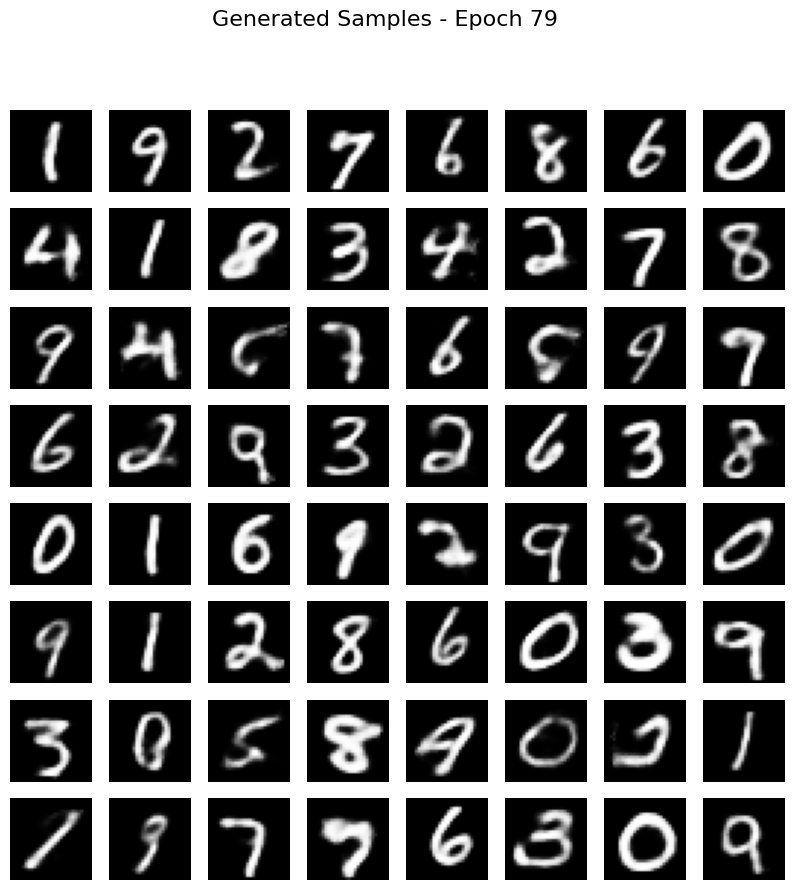

188it [00:03, 49.22it/s, epoch=79, loss=4.02e+3]
188it [00:02, 80.33it/s, epoch=80, loss=4.17e+3]
188it [00:02, 81.85it/s, epoch=81, loss=4.07e+3]
188it [00:02, 86.24it/s, epoch=82, loss=4.22e+3]
188it [00:02, 89.95it/s, epoch=83, loss=4e+3]   
188it [00:02, 90.71it/s, epoch=84, loss=3.73e+3]
188it [00:02, 84.42it/s, epoch=85, loss=4.06e+3]
188it [00:02, 71.70it/s, epoch=86, loss=3.79e+3]
188it [00:02, 78.00it/s, epoch=87, loss=4e+3]   
188it [00:02, 80.49it/s, epoch=88, loss=4.19e+3]
188it [00:02, 86.22it/s, epoch=89, loss=3.9e+3] 
188it [00:02, 89.70it/s, epoch=90, loss=4.06e+3]
188it [00:02, 83.66it/s, epoch=91, loss=3.96e+3]
188it [00:02, 91.32it/s, epoch=92, loss=4e+3]   
188it [00:02, 88.20it/s, epoch=93, loss=3.93e+3]
188it [00:02, 84.87it/s, epoch=94, loss=3.86e+3]
188it [00:02, 84.26it/s, epoch=95, loss=4.07e+3]
188it [00:02, 82.07it/s, epoch=96, loss=4.02e+3]
188it [00:02, 85.04it/s, epoch=97, loss=3.97e+3]
188it [00:02, 90.34it/s, epoch=98, loss=3.84e+3]
188it [00:02, 79.77i

In [55]:

for epoch in range(n_epochs):

    loop=tqdm(enumerate(train_loader))

    if epoch == 0 or epoch == 9 or epoch == 79:
        generate_and_save_samples(model, epoch, test_loader, f'samples_epochw_{epoch}.png')

    for i, (x, y) in loop:

        optimizer.zero_grad()

        x = x.view(x.shape[0], input_dim)
        x_output, mu, sigma_std = model(x)

        L_recon = loss_fn(x_output, x)
        L_reg = -torch.sum(-1 + torch.log(sigma_std.pow(2)) - mu.pow(2) - sigma_std.pow(2))/2

        loss = L_recon + L_reg

        loss.backward()

        optimizer.step()

        loop.set_postfix(loss=loss.item(),epoch=epoch)

